<a href="https://colab.research.google.com/github/DavidAntonio7/Spaceship_Titanic/blob/main/titanic_Espaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#base de dados de treinamento

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
train1 = train.copy()
train.drop(['PassengerId', 'Name'],axis=1, inplace=True)

In [6]:
train.Cabin.nunique()

6560

In [7]:
train.drop(['Cabin'],axis=1, inplace=True)

In [8]:
train.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [9]:
train.shape

(8693, 11)

In [10]:
#função identifica as colunas que precisam ser tratadas
def colstrings(base):
  tipos = base.dtypes
  contador = 0
  tratar = []
  for i in tipos:
    if(i != 'float64') & (i != 'int64'):
      tratar.append(contador)
    contador+=1
  return tratar #vetor com as colunas a serem tratadas

In [11]:
colsTratar = colstrings(train)
colsTratar

[0, 1, 2, 4, 10]

In [12]:
#qtd de valores de cada coluna 
def qtdValores(base,colsTratar):
  valores = []
  for i in colsTratar:
    valores.append(base.iloc[:,i].dropna().unique()) #dropna para nao retornar os NaN
  return valores

In [13]:
qvalores = qtdValores(train,colsTratar)

In [14]:
qvalores[0]

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [15]:
#atribuindo valores inteiros as colunas
def atribuindoInt(base,qvalores,colsTratar):
  for i in range(0,len(colsTratar)):
    counter =0
    for valor in qvalores[i]:
      base.iloc[:,colsTratar[i]] = base.iloc[:,colsTratar[i]].replace(valor,counter)
      counter += 1
  return base

In [16]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


In [17]:
train2 = train.copy()

In [18]:
train = train2.copy()

In [19]:
train = atribuindoInt(train,qvalores,colsTratar)

<ipython-input-15-8f0a37a81b52>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  base.iloc[:,colsTratar[i]] = base.iloc[:,colsTratar[i]].replace(valor,counter)


In [20]:
train.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0


tratando os NaN

In [21]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [22]:
#colunas que tem valores nulls
def tratandoNul(base):
  colNul  = []
  cont =0
  for i in base.isnull().sum():
    if i>0:
      colNul.append(cont)
    cont+=1
  for j in colNul:
    base.iloc[:,j].fillna(base.iloc[:,j].mean(), inplace = True)
  return base
  

In [23]:
train3 = train.copy()

In [24]:
tratandoNul(train).isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [25]:
train = tratandoNul(train)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

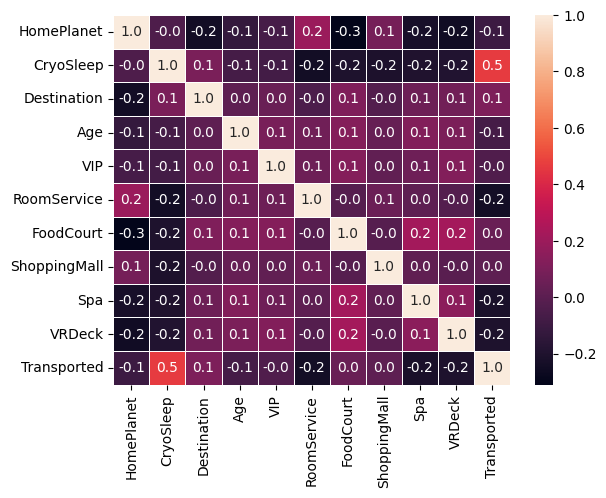

In [27]:
sns.heatmap(train.iloc[:,:].corr(), annot=True, linewidths=.5, fmt='.1f')
plt.show()

#base de dados teste

In [28]:
teste = pd.read_csv('test.csv')

In [29]:
teste.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [30]:
teste.drop(['PassengerId','Cabin','Name'],inplace=True,axis=1)

In [31]:
colsTratar1 = colstrings(teste)
qvalores1 = qtdValores(teste,colsTratar1)
teste = atribuindoInt(teste,qvalores1,colsTratar1)
teste = tratandoNul(teste)

<ipython-input-15-8f0a37a81b52>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  base.iloc[:,colsTratar[i]] = base.iloc[:,colsTratar[i]].replace(valor,counter)


In [32]:
teste.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,1.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0


In [33]:
teste.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

#testando o knn

In [34]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,0.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


In [35]:
#separando os dados em grupos 
from sklearn.model_selection import train_test_split
x_treino, x_test, y_train,y_test = train_test_split(train.iloc[:,0:10],train.Transported,test_size=0.25)
x_treino.shape

(6519, 10)

In [36]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [37]:
prev = []
acuracia = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_treino,y_train)
  prev.append(knn.predict(x_test))
  acuracia.append(metrics.accuracy_score(y_test,prev[i-1]))

In [38]:
acuracia

[0.7143514259429623,
 0.7217111315547378,
 0.7718491260349586,
 0.7672493100275989,
 0.7686292548298068,
 0.766329346826127,
 0.7838086476540939,
 0.7750689972401104,
 0.7930082796688133,
 0.7847286108555658,
 0.795768169273229,
 0.7870285188592456,
 0.7934682612695492,
 0.7879484820607175,
 0.7907083716651334,
 0.7943882244710212,
 0.7985280588776449,
 0.7939282428702852,
 0.797608095676173,
 0.7980680772769089,
 0.7989880404783809,
 0.797148114075437,
 0.7985280588776449,
 0.7911683532658693,
 0.796688132474701,
 0.797148114075437,
 0.797608095676173,
 0.797148114075437,
 0.7980680772769089]

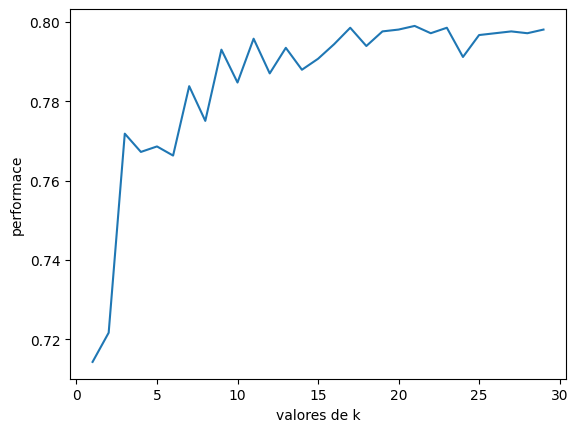

In [39]:
plt.plot(range(1,30),acuracia)
plt.xlabel('valores de k')
plt.ylabel('performace')
plt.show()

In [40]:
#melhor solução é para 17 vizinhos
acuracia[18]

0.797608095676173

In [41]:
teste.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,1.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0


In [42]:

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(train.iloc[:,0:10],train.Transported)
predicao = (knn.predict(teste))

In [43]:
predicao

array([1, 0, 1, ..., 1, 1, 1])

In [44]:
id = pd.read_csv('test.csv').PassengerId

In [45]:
teste.shape

(4277, 10)

In [46]:
id.shape

(4277,)

In [47]:
len(predicao)

4277

In [48]:
resultado = pd.DataFrame({'PassengerId':id,'Transported': predicao})

In [49]:
resultado.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [50]:
res = resultado.copy()

In [51]:
resultado.Transported.replace({1: True, 0: False}, inplace=True)

In [52]:
resultado.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [53]:
resultado.shape

(4277, 2)

In [54]:
resultado.to_csv('resultado.csv',index=False)